In [6]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import os
from astropy import units as u

simT = u.def_unit('simT', represents=(u.year/(2*np.pi)))
simV = u.AU / simT

In [7]:
filename = 'icfile.bin' # The name of the initial condition file

ntotal = 3 # Total number of particles
ndim = 3   # Number of dimensions (leave this at 3)
time = 0   # Starting time

# Particle 1
m1 = 1e-30 * u.M_sun                     # Mass
r1 = 0.1 * u.AU                        # Radius
p1 = np.array([-1.0, 0.0, 0.0]) * u.AU # Position
v1 = np.array([0.0, 0.0, 0.0]) * simV  # Velocity

# Particle 2
m2 = 1e-30 * u.M_sun                     # Mass
r2 = 0.1 * u.AU                        # Radius
p2 = np.array([1.05, 0.0, 0.0]) * u.AU  # Position
v2 = np.array([-0.5, 0.0, 0.0]) * simV # Velocity
print(v2)

# Particle 3 (has to be included, ChaNGa can't handle < 3 particles)
m3 = 1e-50 * u.M_sun                    # Mass
r3 = 0.1 * u.AU                         # Radius
p3 = np.array([-100.5, -0.5, -0.5]) * u.AU# Position
v3 = np.array([0.0, 0.0, 0.0]) * simV   # Velocity

masses = np.array([m1.value, m2.value, m3.value])
positions = np.array([p1.value, p2.value, p3.value])
velocities = np.array([v1.value, v2.value, v3.value])
eps = np.array([r1.value/2, r2.value/2, r3.value/2])  # Radius = 2*eps

[-0.5  0.   0. ] AU / simT


Text(0.5, 1.0, 'T = 0')

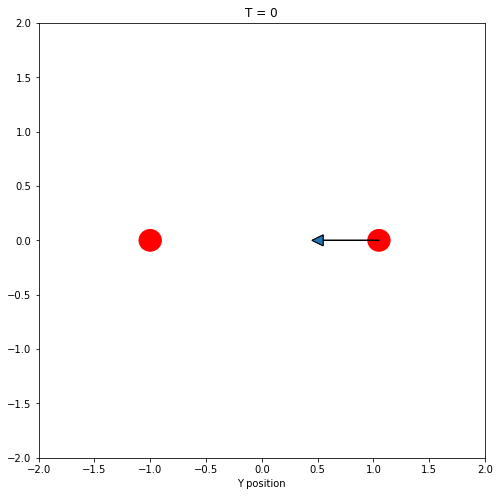

In [20]:
fig, axes = plt.subplots(figsize=(8,8))
circle = plt.Circle((p1[0].value, p1[1].value), r1.value, color='r')
axes.add_artist(circle)
circle = plt.Circle((p2[0].value, p2[1].value), r2.value, color='r')
axes.add_artist(circle)
arrow = plt.arrow(p2[0].value, p2[1].value, v2[0].value, v2[1].value, head_width=0.1, head_length=0.1)
axes.add_artist(arrow)
axes.set_xlim(-2, 2)
axes.set_ylim(-2, 2)
axes.set_xlabel('X position')
axes.set_xlabel('Y position')
axes.set_title('T = 0')

In [8]:
# Calculate the gravitational potential for each particle

pot = np.zeros(ntotal)
for idx in range(ntotal):
    e = 0.0
    for idx1 in range(ntotal):
        if idx == idx1:
            continue
        r = np.sqrt(np.sum((positions[idx] - positions[idx1])**2))
        e += -masses[idx1]/r
    pot[idx] = e

In [9]:
# Write the data out to an ASCII file in the correct format
# See http://faculty.washington.edu/trq/hpcc/tipsy/man/readascii.html for details

f = open('ic.txt', 'w')

f.write(str(ntotal) + ', 0, 0\n')
f.write(str(ndim) + '\n')
f.write(str(time) + '\n')

for idx in range(ntotal):
    f.write(str(masses[idx]) + '\n')

for idx in range(ntotal):
    f.write(str(positions[:,0][idx]) + '\n')
for idx in range(ntotal):
    f.write(str(positions[:,1][idx]) + '\n')
for idx in range(ntotal):
    f.write(str(positions[:,2][idx]) + '\n')
    
for idx in range(ntotal):
    f.write(str(velocities[:,0][idx]) + '\n')
for idx in range(ntotal):
    f.write(str(velocities[:,1][idx]) + '\n')
for idx in range(ntotal):
    f.write(str(velocities[:,2][idx]) + '\n')
    
for idx in range(ntotal):
    f.write(str(eps[idx]) + '\n')
    
for idx in range(ntotal):
    f.write(str(pot[idx]) + '\n')

f.close()

In [10]:
os.system("$HOME/tipsy_tools/ascii2bin < ic.txt > " + filename)
os.system("rm ic.txt")

0